In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

# machine learning processing and metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# data processing
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

# unsupervised algorithms
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering

# metrics
from sklearn.metrics import silhouette_samples, silhouette_score


In [2]:
#import file
path = "Instructions/crypto_data.csv"

df = pd.read_csv(path)
df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1252 entries, 0 to 1251
Data columns (total 7 columns):
Unnamed: 0         1252 non-null object
CoinName           1252 non-null object
Algorithm          1252 non-null object
IsTrading          1252 non-null bool
ProofType          1252 non-null object
TotalCoinsMined    744 non-null float64
TotalCoinSupply    1252 non-null object
dtypes: bool(1), float64(1), object(5)
memory usage: 60.0+ KB


## Clean Up Data

In [4]:
#drop non traded cryptocurrencies
df.IsTrading.value_counts()

True     1144
False     108
Name: IsTrading, dtype: int64

In [5]:
#drop false values in IsTrading
#https://stackoverflow.com/questions/37213556/remove-rows-that-contain-false-in-a-column-of-pandas-dataframe
df2 = df[df.IsTrading]
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1144 entries, 0 to 1247
Data columns (total 7 columns):
Unnamed: 0         1144 non-null object
CoinName           1144 non-null object
Algorithm          1144 non-null object
IsTrading          1144 non-null bool
ProofType          1144 non-null object
TotalCoinsMined    685 non-null float64
TotalCoinSupply    1144 non-null object
dtypes: bool(1), float64(1), object(5)
memory usage: 63.7+ KB


In [6]:
#drop IsTrading
df3 = df2.drop(columns=['IsTrading'])
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1144 entries, 0 to 1247
Data columns (total 6 columns):
Unnamed: 0         1144 non-null object
CoinName           1144 non-null object
Algorithm          1144 non-null object
ProofType          1144 non-null object
TotalCoinsMined    685 non-null float64
TotalCoinSupply    1144 non-null object
dtypes: float64(1), object(5)
memory usage: 62.6+ KB


In [7]:
#drop all rows with null values
df4 = df3.dropna()
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 685 entries, 0 to 1247
Data columns (total 6 columns):
Unnamed: 0         685 non-null object
CoinName           685 non-null object
Algorithm          685 non-null object
ProofType          685 non-null object
TotalCoinsMined    685 non-null float64
TotalCoinSupply    685 non-null object
dtypes: float64(1), object(5)
memory usage: 37.5+ KB


In [8]:
# filter for cryptocurrencies that have been mined
mask = df4.TotalCoinsMined > 0
df5 = df4.loc[mask]
df5.head()

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethereum,Ethash,PoW,1.076842e+08,0


In [9]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 532 entries, 0 to 1247
Data columns (total 6 columns):
Unnamed: 0         532 non-null object
CoinName           532 non-null object
Algorithm          532 non-null object
ProofType          532 non-null object
TotalCoinsMined    532 non-null float64
TotalCoinSupply    532 non-null object
dtypes: float64(1), object(5)
memory usage: 29.1+ KB


In [10]:
df_w_names = df5.copy()

In [11]:
df6 = df5.drop(columns= ['Unnamed: 0','CoinName']).reset_index()
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532 entries, 0 to 531
Data columns (total 5 columns):
index              532 non-null int64
Algorithm          532 non-null object
ProofType          532 non-null object
TotalCoinsMined    532 non-null float64
TotalCoinSupply    532 non-null object
dtypes: float64(1), int64(1), object(3)
memory usage: 20.9+ KB


In [12]:
print('Algorithm')
print(df6.Algorithm.value_counts())
print()
print('ProofType')
print(df6.ProofType.value_counts())

Algorithm
Scrypt                  182
X11                      73
SHA-256                  48
CryptoNight              19
X13                      17
                       ... 
SHA-256 + Hive            1
X11GOST                   1
ECC 256K1                 1
X14                       1
Jump Consistent Hash      1
Name: Algorithm, Length: 71, dtype: int64

ProofType
PoW                     237
PoW/PoS                 176
PoS                      86
DPoS                      9
PoC                       3
PoS/PoW                   2
DPOS                      1
TPoS                      1
PoW + Hive                1
PoST                      1
POBh                      1
PoW and PoS               1
Proof of Authority        1
dPoW/PoW                  1
PoW/PoS                   1
PoA                       1
HPoW                      1
PoW/PoW                   1
PoS/LPoS                  1
Zero-Knowledge Proof      1
Proof of Trust            1
PoW/nPoS                  1
LPoS         

both columns should be label encoded for the sheer number of categories but they will be one-hot encoded instead, according to the instructions. Ski-kit Learn OneHotEncoder was used to have variables saved off

In [13]:
#label encoding with sci-kit learn
cols_oh = ["Algorithm", "ProofType"]

df_oh = pd.get_dummies(df6.loc[:, cols_oh])
print(df_oh.columns)
df_oh

df_oh.head()

Index(['Algorithm_1GB AES Pattern Search', 'Algorithm_536',
       'Algorithm_Argon2d', 'Algorithm_BLAKE256', 'Algorithm_Blake',
       'Algorithm_Blake2S', 'Algorithm_Blake2b', 'Algorithm_C11',
       'Algorithm_Cloverhash', 'Algorithm_Counterparty',
       'Algorithm_CryptoNight', 'Algorithm_CryptoNight Heavy',
       'Algorithm_CryptoNight-V7', 'Algorithm_Cryptonight-GPU',
       'Algorithm_DPoS', 'Algorithm_Dagger', 'Algorithm_Dagger-Hashimoto',
       'Algorithm_ECC 256K1', 'Algorithm_Equihash',
       'Algorithm_Equihash+Scrypt', 'Algorithm_Ethash', 'Algorithm_Exosis',
       'Algorithm_Green Protocol', 'Algorithm_Groestl', 'Algorithm_HMQ1725',
       'Algorithm_HybridScryptHash256', 'Algorithm_IMesh',
       'Algorithm_Jump Consistent Hash', 'Algorithm_Keccak',
       'Algorithm_Leased POS', 'Algorithm_Lyra2RE', 'Algorithm_Lyra2REv2',
       'Algorithm_Lyra2Z', 'Algorithm_M7 POW', 'Algorithm_Multiple',
       'Algorithm_NIST5', 'Algorithm_NeoScrypt', 'Algorithm_Ouroboros',
     

,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,Algorithm_Cloverhash,Algorithm_Counterparty,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
# drop first column from one hot encode
df_oh = df_oh.drop(columns = ['Algorithm_1GB AES Pattern Search', 'ProofType_DPOS'])
df_oh.head()

,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,Algorithm_Cloverhash,Algorithm_Counterparty,Algorithm_CryptoNight,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
#scale numeric data
cols_num = ['TotalCoinsMined', 'TotalCoinSupply']
df_num = df6.loc[:, cols_num]


scaler = StandardScaler().fit(df_num)
df_scale = pd.DataFrame(scaler.transform(df_num), columns=df_num.columns)
df_scale.head()

,TotalCoinsMined,TotalCoinSupply
0,-0.117108,-0.152870
1,-0.093970,-0.145009
2,0.524946,4.489424
3,-0.116715,-0.152560
4,-0.114747,-0.152870


In [16]:
df_clean = pd.concat([df_scale, df_oh], axis=1)
df_clean.head()

,TotalCoinsMined,TotalCoinSupply,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,Algorithm_Cloverhash,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,-0.117108,-0.152870,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,-0.093970,-0.145009,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0.524946,4.489424,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,-0.116715,-0.152560,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.114747,-0.152870,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
corrs = df_clean.corr()
corrs

,TotalCoinsMined,TotalCoinSupply,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,Algorithm_Cloverhash,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
TotalCoinsMined,1.000000,0.702301,0.016617,-0.005063,0.013079,-0.008797,-0.005070,0.015188,-0.007178,-0.005065,...,-0.043840,-0.004977,-0.004449,-0.005021,-0.004884,0.047690,-0.005066,-0.005010,-0.004130,-0.004972
TotalCoinSupply,0.702301,1.000000,0.025429,-0.006634,0.031467,-0.008867,-0.006610,-0.009236,-0.009372,-0.006615,...,-0.057185,-0.006563,-0.004646,-0.006584,0.038254,0.048972,-0.006623,-0.006585,-0.005993,-0.006506
Algorithm_536,0.016617,0.025429,1.000000,-0.001883,-0.002666,-0.003268,-0.001883,-0.002666,-0.002666,-0.001883,...,0.061719,-0.001883,-0.001883,-0.001883,-0.001883,-0.001883,-0.001883,-0.001883,-0.001883,-0.001883
Algorithm_Argon2d,-0.005063,-0.006634,-0.001883,1.000000,-0.002666,-0.003268,-0.001883,-0.002666,-0.002666,-0.001883,...,-0.030513,-0.001883,-0.001883,-0.001883,-0.001883,-0.001883,-0.001883,-0.001883,-0.001883,-0.001883
Algorithm_BLAKE256,0.013079,0.031467,-0.002666,-0.002666,1.000000,-0.004626,-0.002666,-0.003774,-0.003774,-0.002666,...,0.022087,-0.002666,-0.002666,-0.002666,-0.002666,-0.002666,-0.002666,-0.002666,-0.002666,-0.002666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ProofType_Proof of Authority,0.047690,0.048972,-0.001883,-0.001883,-0.002666,-0.003268,-0.001883,-0.002666,-0.002666,-0.001883,...,-0.030513,-0.001883,-0.001883,-0.001883,-0.001883,1.000000,-0.001883,-0.001883,-0.001883,-0.001883
ProofType_Proof of Trust,-0.005066,-0.006623,-0.001883,-0.001883,-0.002666,-0.003268,-0.001883,-0.002666,-0.002666,-0.001883,...,-0.030513,-0.001883,-0.001883,-0.001883,-0.001883,-0.001883,1.000000,-0.001883,-0.001883,-0.001883
ProofType_TPoS,-0.005010,-0.006585,-0.001883,-0.001883,-0.002666,-0.003268,-0.001883,-0.002666,-0.002666,-0.001883,...,-0.030513,-0.001883,-0.001883,-0.001883,-0.001883,-0.001883,-0.001883,1.000000,-0.001883,-0.001883
ProofType_Zero-Knowledge Proof,-0.004130,-0.005993,-0.001883,-0.001883,-0.002666,-0.003268,-0.001883,-0.002666,-0.002666,-0.001883,...,-0.030513,-0.001883,-0.001883,-0.001883,-0.001883,-0.001883,-0.001883,-0.001883,1.000000,-0.001883


## Obervations

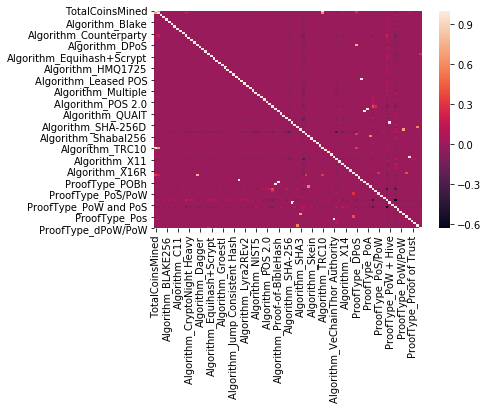

In [18]:
sns.heatmap(corrs)
plt.show()

Significant correlations between variables are low in numner, but there are a few scattered in the data set that have significant correlations.

## Dimensionality Reduction

In [19]:
# PCA

# Initialize PCA model
pca = PCA(n_components=0.90)
pca.fit(df_clean)

print(pca.explained_variance_ratio_)

[0.4862308  0.11220403 0.08460823 0.07290635 0.05756135 0.03178765
 0.01972533 0.00969661 0.00892107 0.00822535 0.00769491 0.00628705]


In [20]:
#code inspired from instructor homework review

df_pca = pd.DataFrame(pca.transform(df_clean))
df_pca.columns = [f"Feature {x}" for x in range(1, len(pca.explained_variance_ratio_)+1)]
df_pca.head()

#df needed for t-SNE

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,Feature 11,Feature 12
0,-0.209277,-0.801760,0.172975,-0.672387,-0.028019,-0.027345,0.002167,-0.016857,-0.047427,-0.023029,-0.007850,0.015797
1,-0.187390,-0.804253,0.162555,-0.673031,-0.028774,-0.027208,0.002271,-0.017850,-0.047569,-0.023068,-0.007753,0.015896
2,3.529673,-0.305515,2.915412,0.414782,-0.163305,-0.259270,-0.278503,-0.152146,0.747551,0.360582,-0.233799,-0.070236
3,-0.180157,0.694296,-0.165778,0.239946,-0.278392,-0.614743,0.624068,-0.015117,0.027787,0.009236,-0.026158,-0.026473
4,-0.173289,0.688574,-0.154398,0.131930,-0.212559,-0.104395,-0.242159,0.002997,0.113058,-0.125668,0.058178,-0.129383


Top 13 components make up 90% of data.

Data set suffers from multicolinearity-- there is an uneven distribution of data among the columns.

In [21]:
# TSNE
tsne = TSNE(random_state=42)
tsne_features = tsne.fit_transform(df_pca)
print(tsne_features.shape)

tsne_df = pd.DataFrame(tsne_features, columns=["Feature1", "Feature2"])
tsne_df.head()


(532, 2)


,Feature1,Feature2
0,-24.475790,-8.556685
1,-24.388523,-2.580778
2,-1.025535,-1.082586
3,4.252989,30.332909
4,15.769459,16.341423


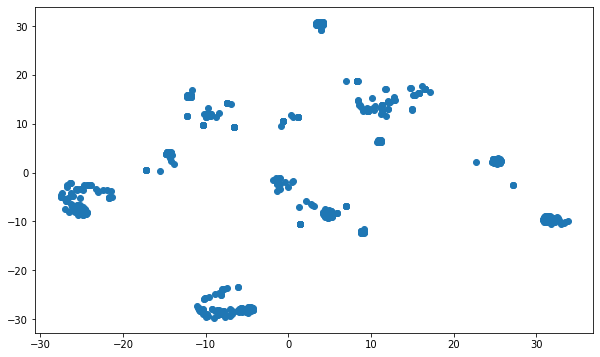

In [22]:
plt.figure(figsize=(10, 6))
plt.scatter(tsne_df["Feature1"], tsne_df["Feature2"])
plt.show()

There are roughly 7 clusters that can be visually observed in the data above.

## Cluster Analysis with k-Means

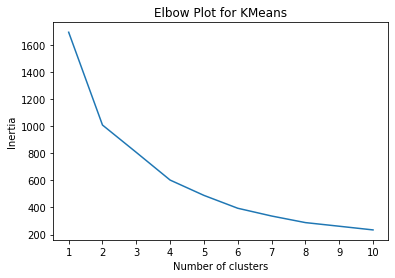

In [23]:
# KMEANS

inertia = []
# Same as k = list(range(1, 11))
k = [1,2,3,4,5,6,7,8,9,10]


# Looking for the best k
for i in k:
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(df_pca)
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title("Elbow Plot for KMeans")
plt.show()

The best bends are at: 2, 4, 6 and 8.

In [24]:
def getSilhouette(X, range_n_clusters, model = "kmeans"):
    for n_clusters in range_n_clusters:

        # Create a subplot with 1 row and 2 columns
        fig, ax1 = plt.subplots(1, 1)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        if model == "kmeans":
            clusterer = KMeans(n_clusters=n_clusters, random_state=42)
        else:
            clusterer = AgglomerativeClustering(n_clusters=n_clusters,
                                 affinity='euclidean',
                                 linkage='ward')
            
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print(
            "For n_clusters =",
            n_clusters,
            "The average silhouette_score is :",
            silhouette_avg,
        )

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                ith_cluster_silhouette_values,
                facecolor=color,
                edgecolor=color,
                alpha=0.7,
            )

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


        plt.suptitle(
            f"Silhouette analysis for {model} clustering on sample data with n_clusters = %d"
            % n_clusters,
            fontsize=14,
            fontweight="bold",
        )

    plt.show()

For n_clusters = 2 The average silhouette_score is : 0.9190637431256616
For n_clusters = 3 The average silhouette_score is : 0.8115476604481611
For n_clusters = 4 The average silhouette_score is : 0.30985657018384477
For n_clusters = 5 The average silhouette_score is : 0.37919695141695003
For n_clusters = 6 The average silhouette_score is : 0.40387080485439647
For n_clusters = 7 The average silhouette_score is : 0.40926908643538884
For n_clusters = 8 The average silhouette_score is : 0.4546956135750383
For n_clusters = 9 The average silhouette_score is : 0.4938090655330911
For n_clusters = 10 The average silhouette_score is : 0.49621930382509405


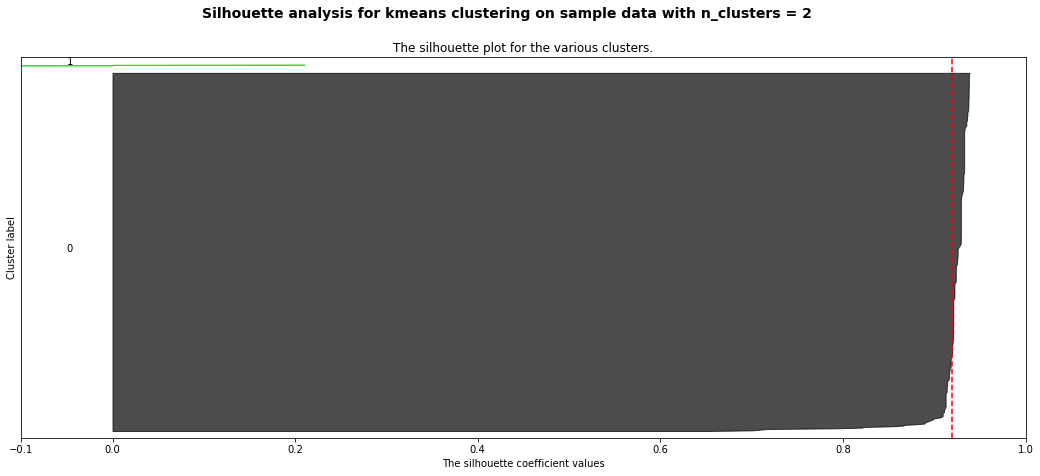

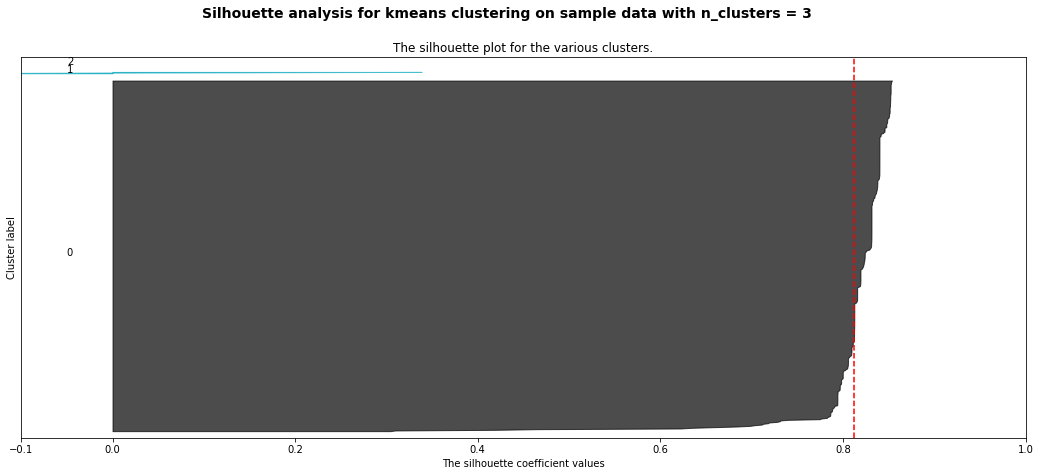

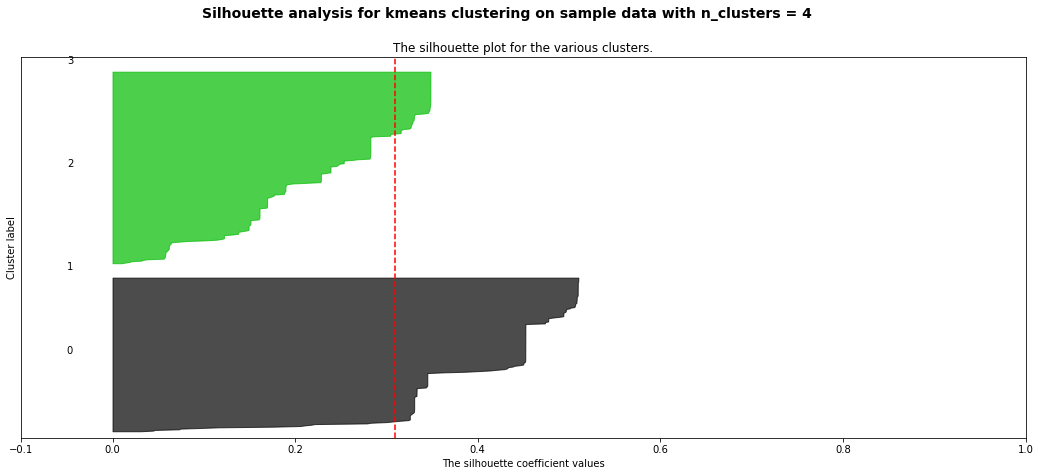

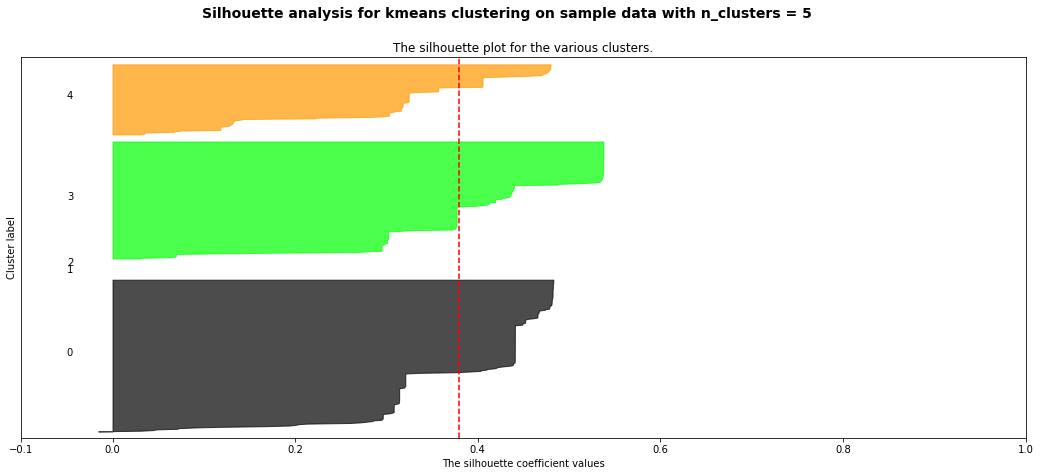

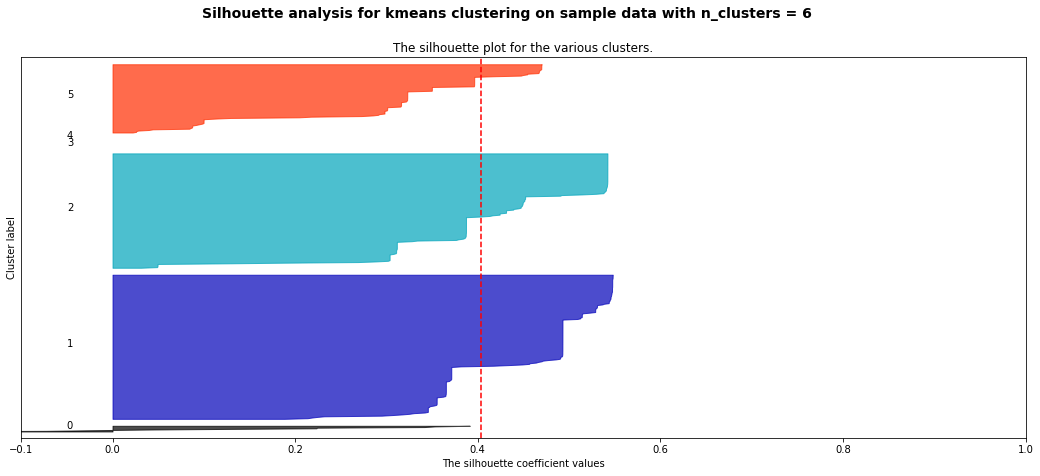

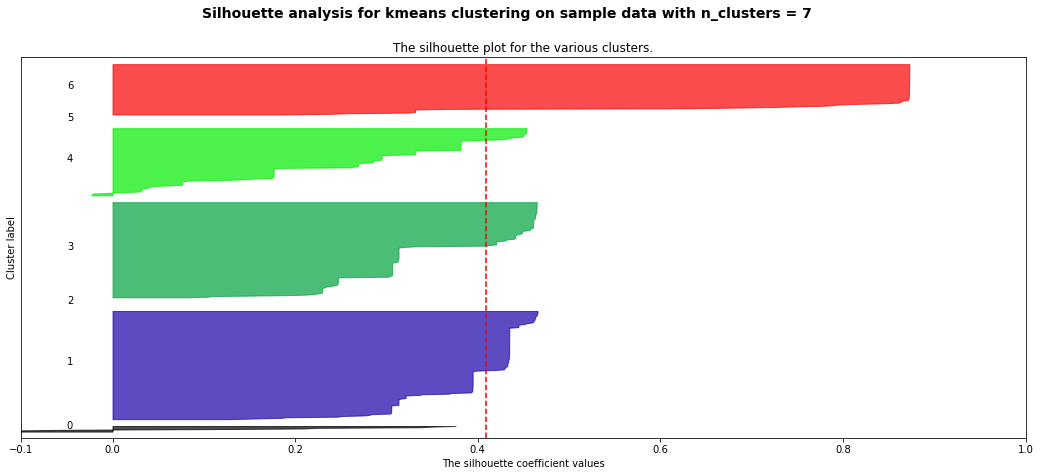

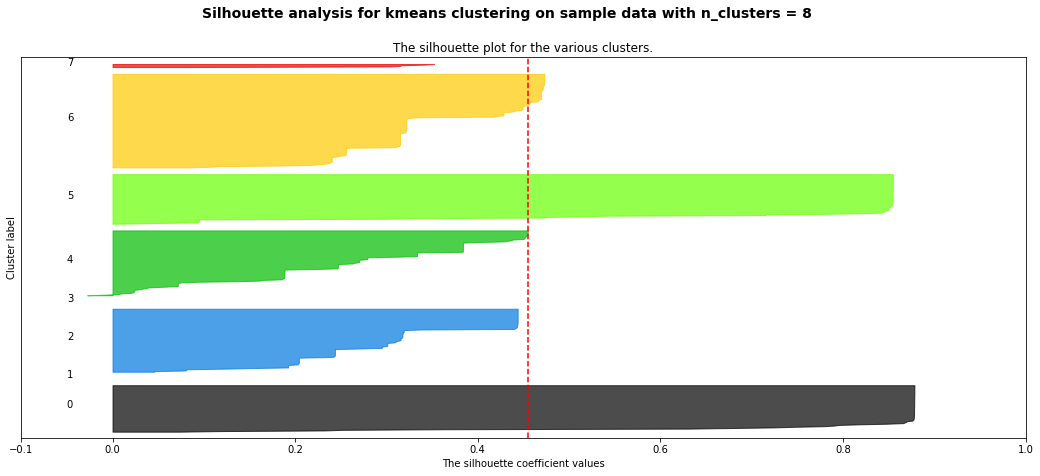

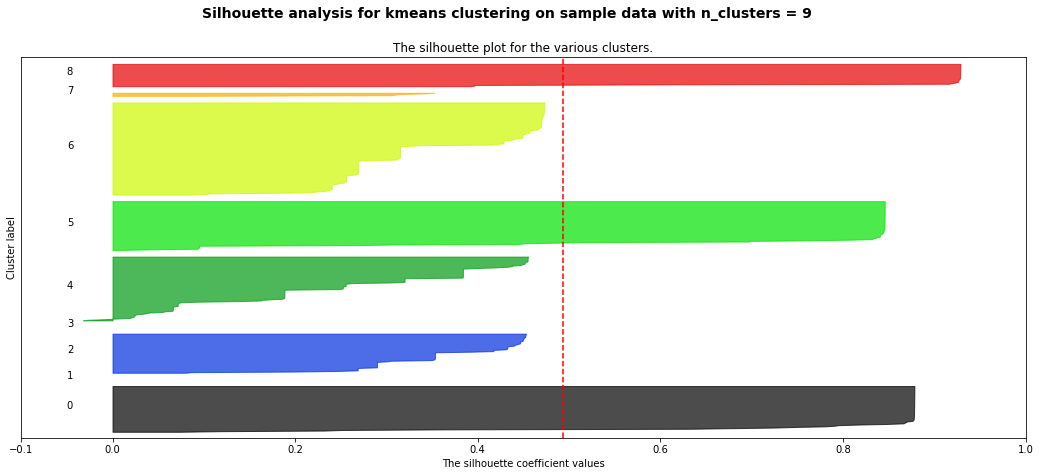

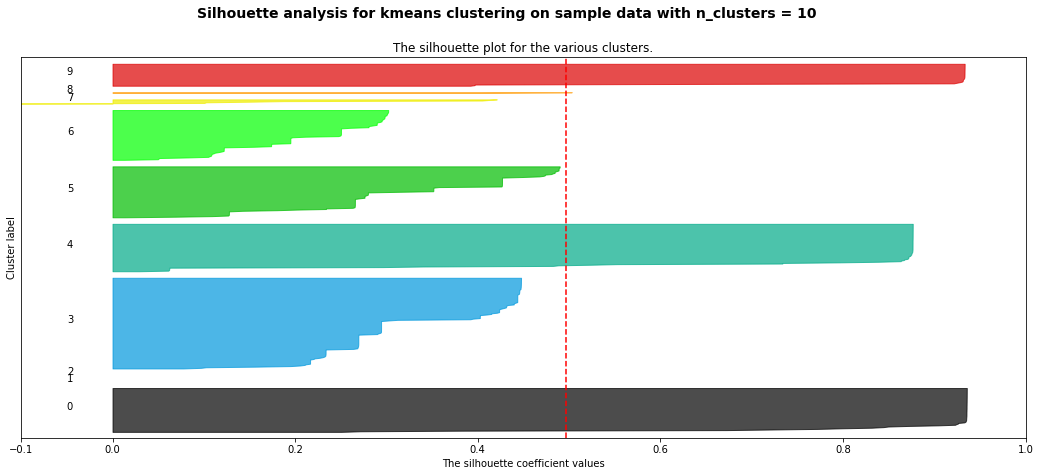

In [28]:
X = df_pca.values
range_n_clusters  = [2,3,4,5,6,7,8,9,10]

getSilhouette(X, range_n_clusters, "kmeans")

In [29]:
# Initializing model with K = 2, which received the best silhouette score. 
k = 2
model = KMeans(n_clusters=k, random_state=42)

# Fitting model
model.fit(df_pca)

# predictions
labels = model.predict(df_pca)
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

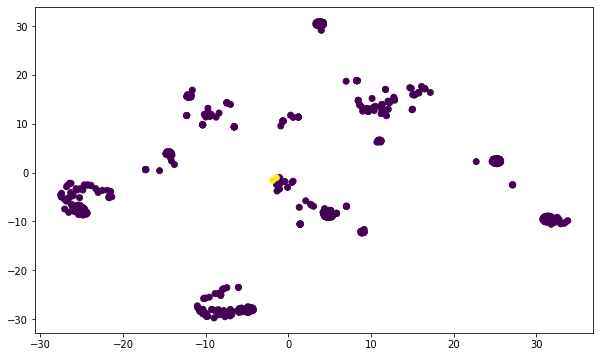

In [30]:
plt.figure(figsize=(10, 6))
plt.scatter(tsne_df["Feature1"], tsne_df["Feature2"], c=labels)
plt.show()

In [31]:
# another view at clusters

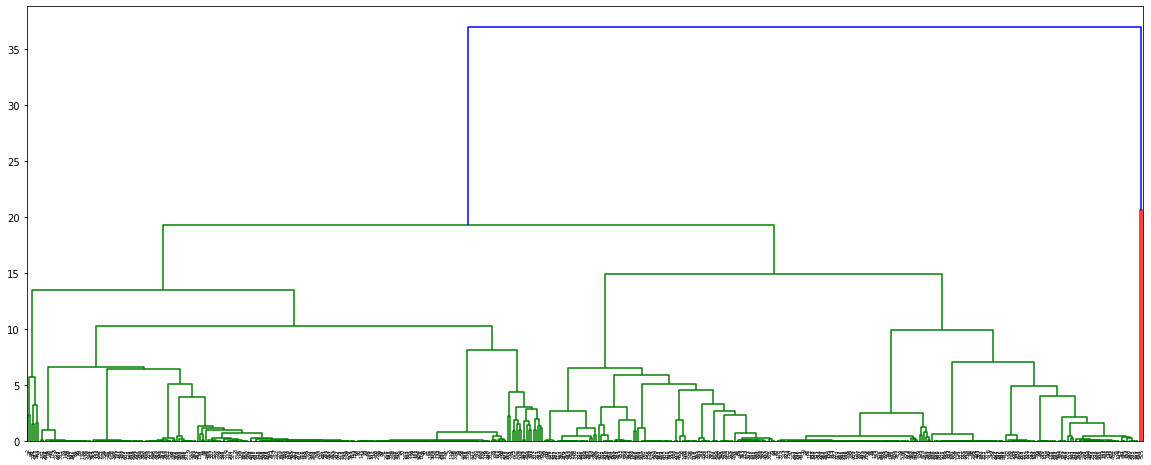

In [32]:
# Hierarchicalalal Agglomerative
mergings = linkage(df_pca, method='ward')

plt.figure(figsize=(20,8))
dendrogram(mergings,
          leaf_rotation=90,
          leaf_font_size=5)
plt.show()

There is an blue and a green cluster.

For n_clusters = 2 The average silhouette_score is : 0.9827261616957284
For n_clusters = 3 The average silhouette_score is : 0.9772516952898129
For n_clusters = 4 The average silhouette_score is : 0.9395699299828499
For n_clusters = 5 The average silhouette_score is : 0.9373114540434949
For n_clusters = 6 The average silhouette_score is : 0.9126351316533016
For n_clusters = 7 The average silhouette_score is : 0.9145021355554103
For n_clusters = 8 The average silhouette_score is : 0.9166561260922298
For n_clusters = 9 The average silhouette_score is : 0.8782638052199375
For n_clusters = 10 The average silhouette_score is : 0.8811663787276238


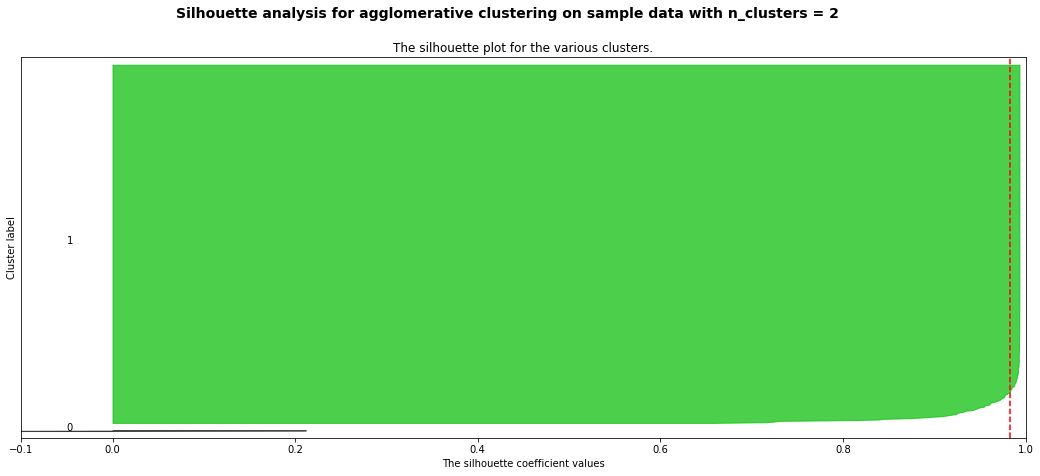

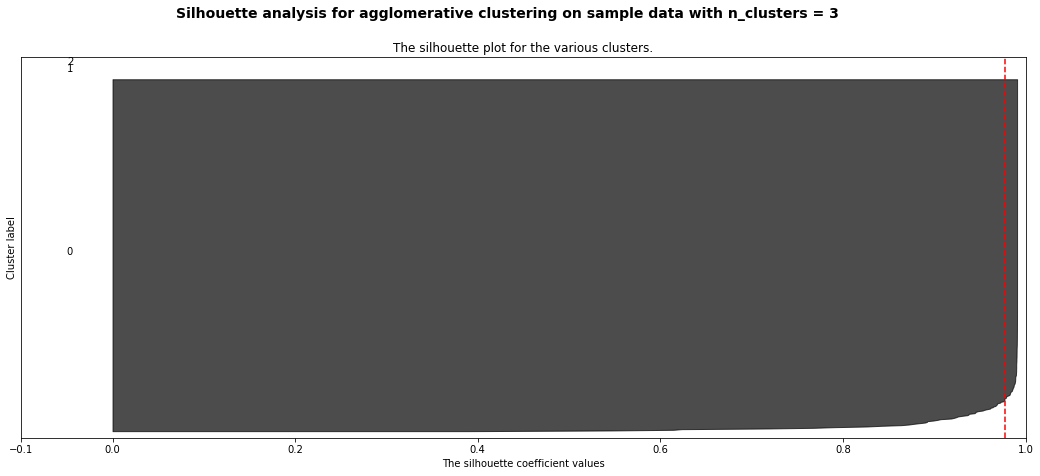

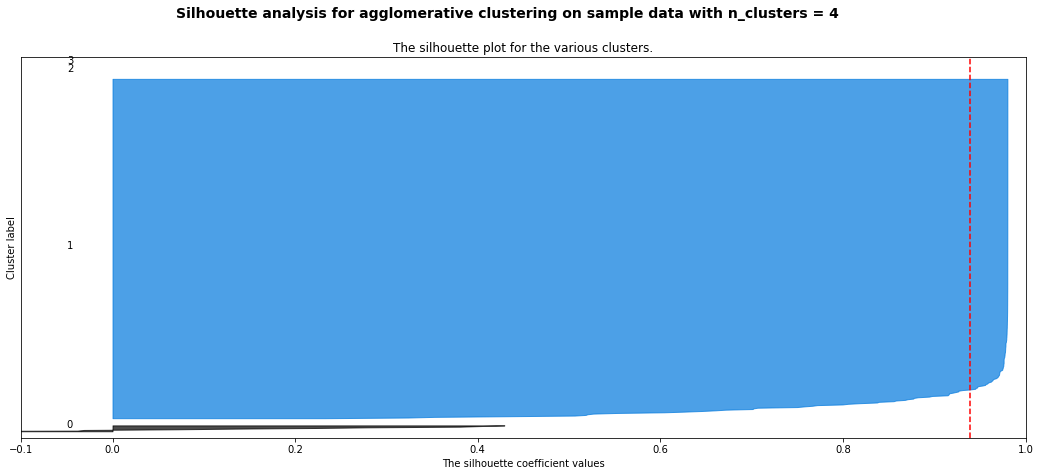

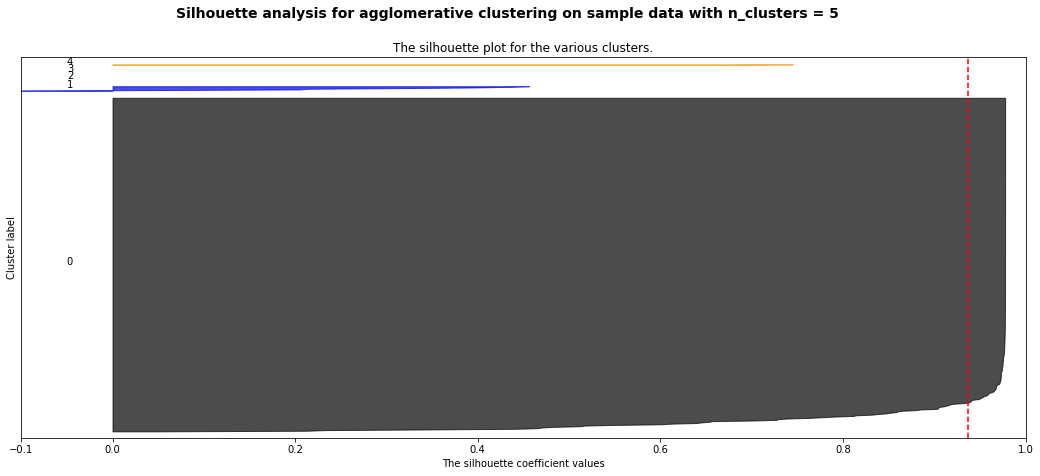

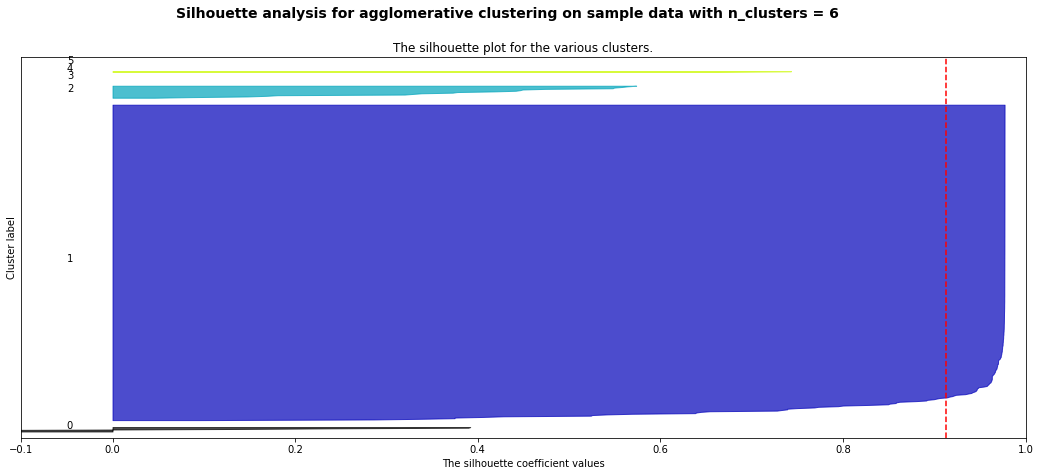

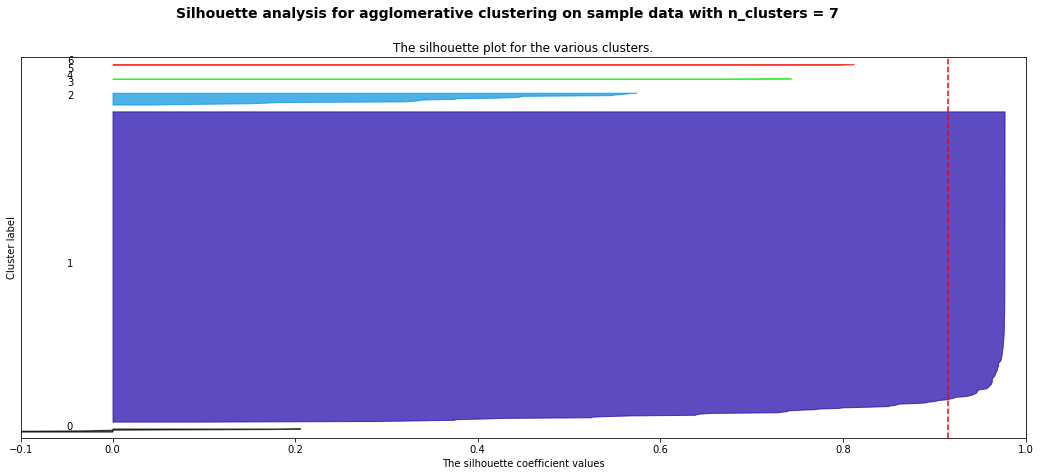

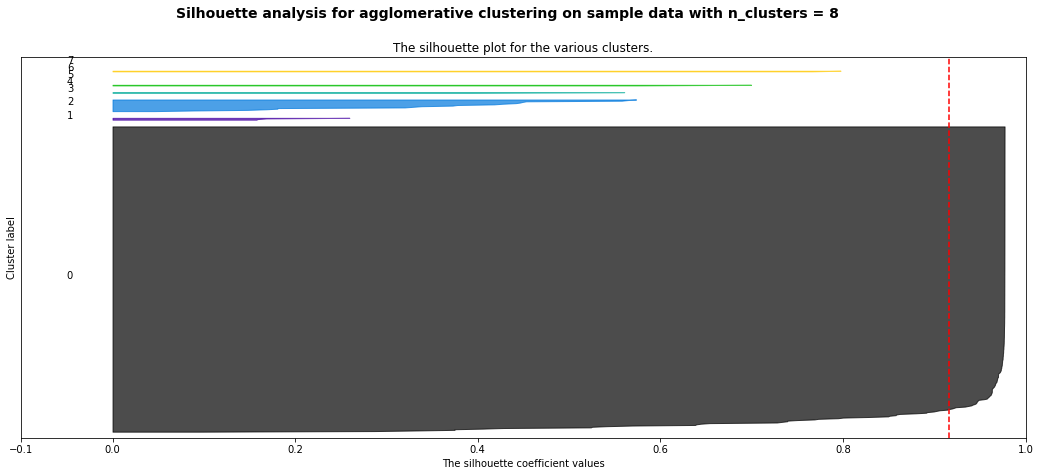

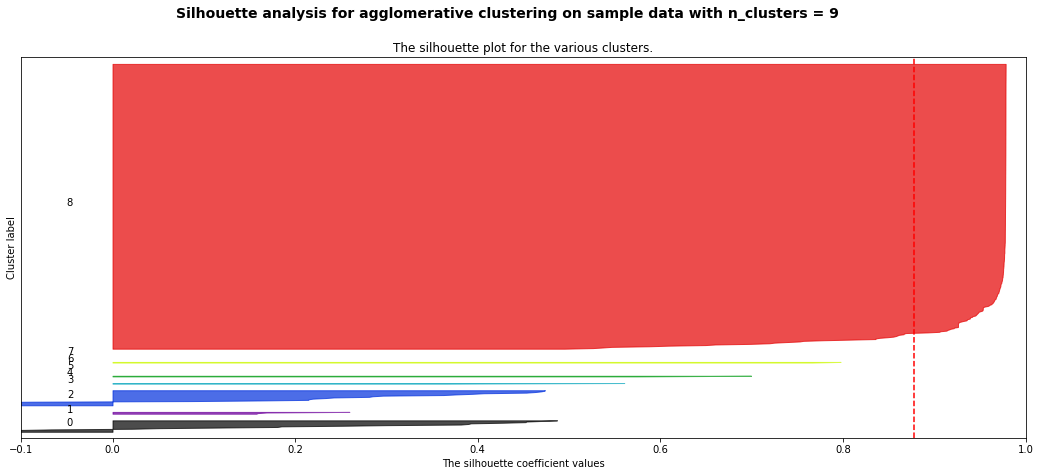

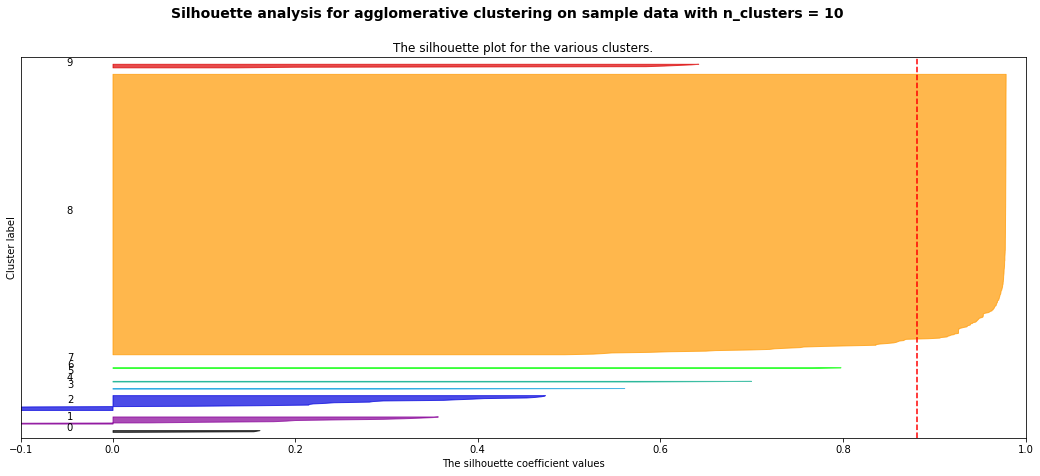

In [33]:
# Silhouette score
X = df_scale.values
range_n_clusters  = [2,3,4,5,6,7,8,9,10]

getSilhouette(X, range_n_clusters, "agglomerative")